In [1]:
import json
import pickle
import bz2
import regex
from tqdm import tqdm
from scipy import sparse
import warnings
warnings.filterwarnings('ignore')
from sklearn.semi_supervised import LabelSpreading
from sklearn.semi_supervised import LabelPropagation

In [170]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline
from nltk.corpus import stopwords
from pymystem3 import Mystem
#from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from pymorphy2 import MorphAnalyzer
from bs4 import BeautifulSoup
import glob, os
import tqdm

Populating the interactive namespace from numpy and matplotlib


/Users/gavril/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [237]:
c=0

df = pd.DataFrame(columns=['name','text'])
os.chdir('/Users/gavril/Downloads/vasya')
for file in glob.glob("*.html"):
    print(file)
    with open(file, "r") as f:

        contents = f.read()
        #print(contents)
        soup = BeautifulSoup(contents, 'lxml')


        for x in soup.findAll('div',"body"):
            try:
                #print(x)
                #print("!",x.find('div',"from_name").get_text())
                #print("???",x.find('div',"text").get_text())
                #print('_______')
                name_=re.sub("^\s+|\n|\r|\s+$", '', x.find('div',"from_name").get_text())
                text_=re.sub("^\s+|\n|\r|\s+$", '', x.find('div',"text").get_text())
                df = df.append({'name': name_, 'text' : text_ }, ignore_index=True)
            except:
                pass

df.head(15)

messages13.html
messages2.html
messages3.html
messages12.html
messages4.html
messages8.html
messages9.html
messages5.html
messages6.html
messages.html
messages7.html
messages11.html
messages10.html


,name,text
0,Вася,"Угу, что-то меня тут вообще все пугает"
1,Гавриил Погорелов,ну так и сделай все чтоб быстрей умотать
2,Гавриил Погорелов,дурная
3,Вася,Я довольная пипец
4,Гавриил Погорелов,сделал гадость-сердцу радость
5,Вася,Тут другая концепция
6,Гавриил Погорелов,))
7,Вася,"Угу, немного адреналина"
8,Гавриил Погорелов,женщина
9,Вася,мужчина


In [168]:
df.shape

(6321, 2)

In [173]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

sentenses = []

for text in df.text:
    
    for sent in sent_tokenize(text):
        sentenses.append(sent)
        
print(len(sentenses))
print(sentenses[:2])

6661
['Угу, что-то меня тут вообще все пугает', 'ну так и сделай все чтоб быстрей умотать']


[nltk_data] Error loading punkt: <urlopen error [Errno 61] Connection
[nltk_data]     refused>


In [344]:
regex = re.compile("[А-Яа-я]+")
def words_only(text, regex=regex):
    #print(text)
    return " ".join(regex.findall(text))


mystopwords = stopwords.words('russian') + ['это', 'наш' ,'вс', 'ага','тыс', 'млн', 'млрд', 'также',  'т', 'д','вы''ну',  'а','угу','не','это','ещ','еще','что','в','у']
mystopwords.remove('я')
def  remove_stopwords(text, mystopwords = mystopwords):
    try:
       # print('g',text)
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        #print(text)
        return ""

    
m = Mystem()
def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "
    
def preprocessing(text):
    words = words_only(text)
    
    lemmas = lemmatize( words)
    no_stopwords = remove_stopwords(lemmas )
    return(no_stopwords )

In [345]:
df['text_lemma']=df.text.apply(preprocessing)

In [346]:
df.head(15)

,name,text,text_lemma
0,Вася,"Угу, что-то меня тут вообще все пугает",я вообще пугать
1,Гавриил Погорелов,ну так и сделай все чтоб быстрей умотать,сделать быстро уматывать
2,Гавриил Погорелов,дурная,дурной
3,Вася,Я довольная пипец,я довольный пипец
4,Гавриил Погорелов,сделал гадость-сердцу радость,сделать гадость сердце радость
5,Вася,Тут другая концепция,концепция
6,Гавриил Погорелов,)),
7,Вася,"Угу, немного адреналина",немного адреналин
8,Гавриил Погорелов,женщина,женщина
9,Вася,мужчина,мужчина


In [329]:
'ну',  'а','угу','не','это','ещ','еще','что','в','у',

('ну', 'а', 'угу', 'не', 'это', 'ещ', 'еще', 'что', 'в', 'у')

###  Общие

In [347]:
from collections import Counter

lemmata = []
for index, row in df['text_lemma'].iteritems():
    lemmata += row.split()
cnt = Counter(lemmata)
for i in cnt.most_common(15):
    print(i[0],round(i[1]/len(lemmata)*100,2), '%')

я 7.86 %
мочь 0.83 %
хотеть 0.75 %
знать 0.72 %
просто 0.57 %
весь 0.55 %
женщина 0.48 %
блин 0.46 %
спать 0.44 %
давать 0.43 %
думать 0.43 %
шо 0.41 %
час 0.38 %
твой 0.37 %
говорить 0.37 %


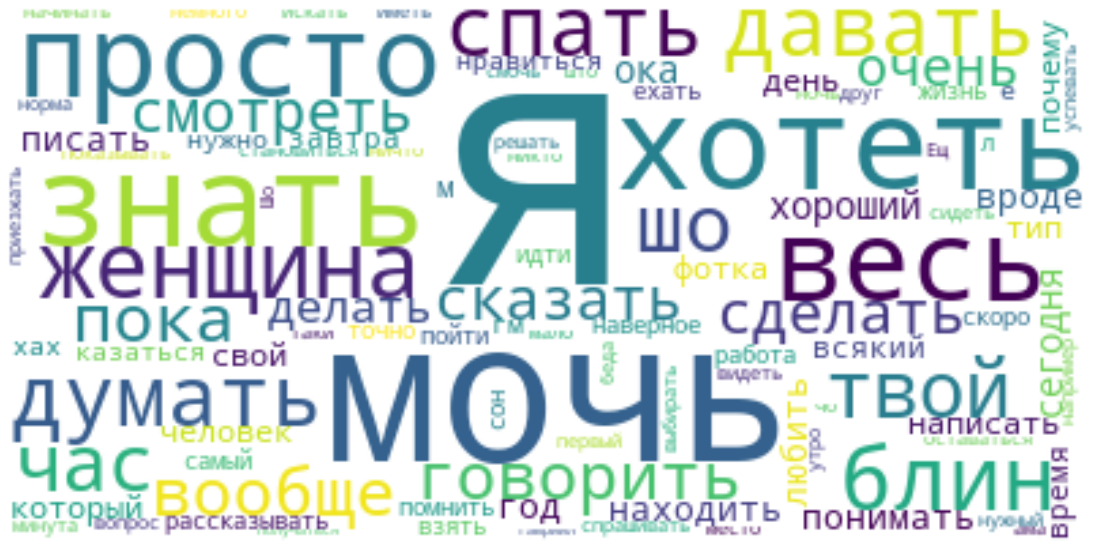

In [348]:
from wordcloud import *
word_freq = [i for i in cnt.most_common(100)]
wd = WordCloud(background_color = 'white')
wd.generate_from_frequencies(dict(word_freq))
plt.figure(figsize=(20,10))
plt.imshow(wd, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### Vasya


In [349]:
df.head()

,name,text,text_lemma
0,Вася,"Угу, что-то меня тут вообще все пугает",я вообще пугать
1,Гавриил Погорелов,ну так и сделай все чтоб быстрей умотать,сделать быстро уматывать
2,Гавриил Погорелов,дурная,дурной
3,Вася,Я довольная пипец,я довольный пипец
4,Гавриил Погорелов,сделал гадость-сердцу радость,сделать гадость сердце радость


In [350]:
df_vasya=df[df.name=='Вася']

In [351]:
df_vasya.shape

(3060, 3)

In [352]:
from collections import Counter

lemmata = []
for index, row in df_vasya['text_lemma'].iteritems():
    lemmata += row.split()
cnt = Counter(lemmata)
for i in cnt.most_common(15):
    print(i[0],round(i[1]/len(lemmata)*100,2), '%')

я 9.1 %
мочь 0.96 %
хотеть 0.94 %
знать 0.81 %
просто 0.66 %
весь 0.55 %
блин 0.51 %
думать 0.48 %
твой 0.46 %
говорить 0.44 %
спать 0.44 %
очень 0.41 %
вообще 0.4 %
сделать 0.4 %
давать 0.38 %


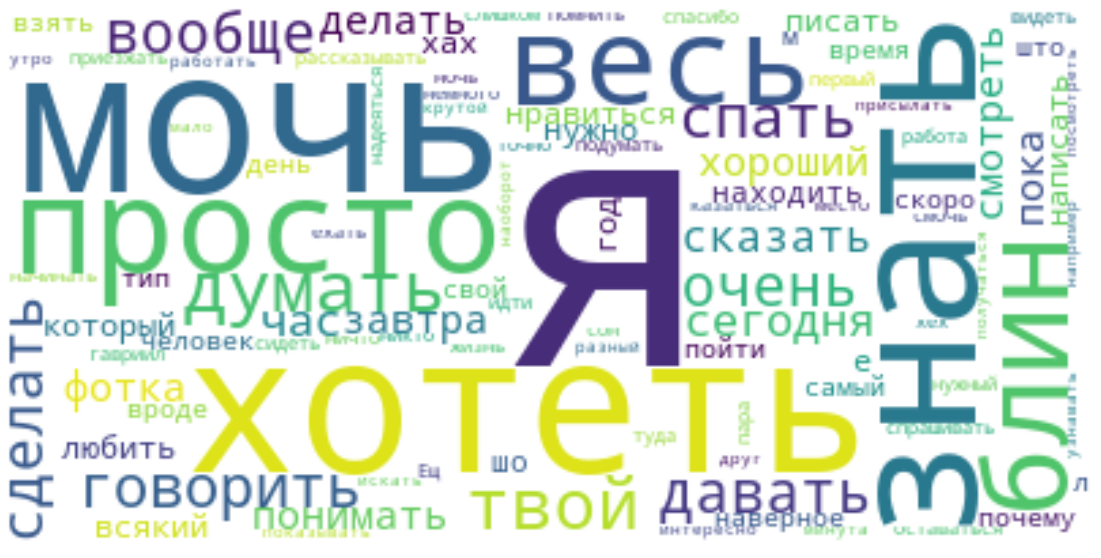

In [353]:
from wordcloud import *
word_freq = [i for i in cnt.most_common(100)]
wd = WordCloud(background_color = 'white')
wd.generate_from_frequencies(dict(word_freq))
plt.figure(figsize=(20,10))
plt.imshow(wd, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## Gavriil

In [354]:
df_gavriil=df[df.name=='Гавриил Погорелов']

In [355]:
from collections import Counter

lemmata = []
for index, row in df_gavriil['text_lemma'].iteritems():
    lemmata += row.split()
cnt = Counter(lemmata)
for i in cnt.most_common(15):
    print(i[0],round(i[1]/len(lemmata)*100,2), '%')

я 5.39 %
женщина 1.35 %
ока 0.8 %
шо 0.69 %
гм 0.6 %
весь 0.59 %
мочь 0.57 %
знать 0.55 %
давать 0.51 %
спать 0.48 %
пока 0.46 %
просто 0.4 %
чо 0.4 %
Шо 0.38 %
блин 0.38 %


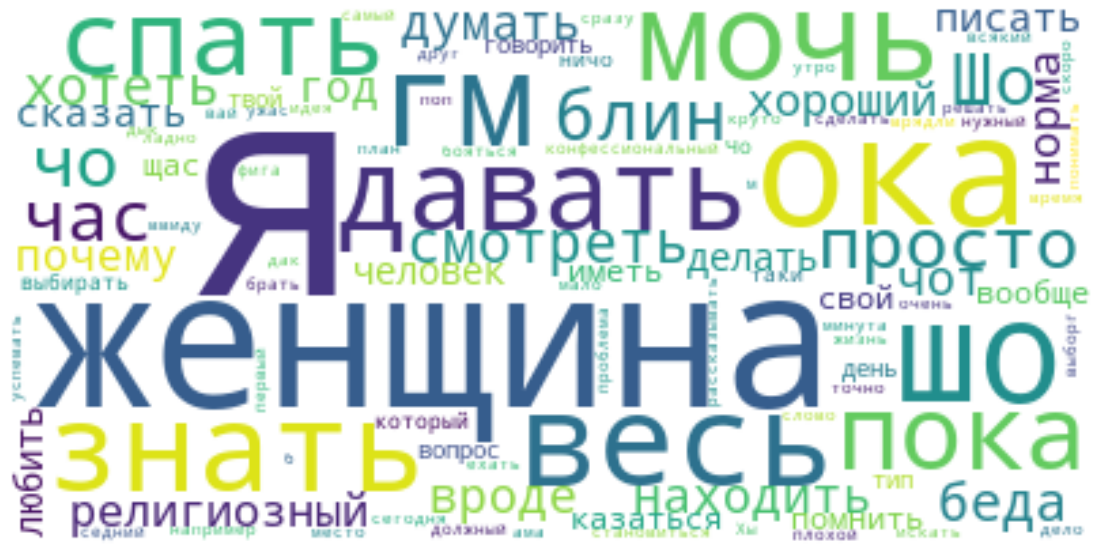

In [356]:
from wordcloud import *
word_freq = [i for i in cnt.most_common(100)]
wd = WordCloud(background_color = 'white')
wd.generate_from_frequencies(dict(word_freq))
plt.figure(figsize=(20,10))
plt.imshow(wd, interpolation = 'bilinear')
plt.axis('off')
plt.show()